<div class="alert alert-block alert-info">
    <center><h1> Visualizers </h1></center>
</div>

# Sections

- **[1. Signal visualization](#1.-Signal-visualization)**
    - [Voltage amplitude (temporal-wise)](#Voltage-amplitude-(temporal-wise))
    - [Voltage amplitude (trial-wise)](#Voltage-amplitude-(trial-wise))
    - [Mean voltage amplitude (channel-wise)](#Mean-voltage-amplitude-(channel-wise))
    - [PSD - Power Spectral Density](#PSD---Power-Spectral-Density)
    - [STFT - Short Time Fourier Transform](#STFT---Short-Time-Fourier-Transform)
    - [CWT - Continuous Wavelet Transform](#CWT---Continuous-Wavelet-Transform)
    - [t-SNE - t-Distributed Stochastic Neighbor Embedding](#t-SNE---t-Distributed-Stochastic-Neighbor-Embedding)
- **[2. Metrics visualization](2.-Metrics-visualization)**
    - [Confusion matrix](#Confusion-matrix)

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import scipy.signal

from fake_signal_functions.fake_signals import create_gaussian_transcient, create_sin_wave, create_chirp, plot_signal

## 1. Signal visualization

In [3]:
from data_loading_functions.data_loader import EEGDataset
path = '../../Datasets/BCI_IV_2a/formatted_raw/'
X_train, y_train, _, _, _, _ = EEGDataset(pilot_idx=1, start=1.5, end=6., data_path=path, fs=250).load_dataset()

Properties: 288 train trials - 22 channels - 7.5s trial length
Selecting classes [0, 1, 2, 3] & balancing...
Selecting 22 channels
Selecting time-window [1.5 - 6.0]s - (4.5s)...
Output shapes:  (288, 22, 1125) (288, 22, 1125) (288, 22, 1125)
Output classes:  [0 1 2 3]


### Voltage amplitude (temporal-wise)
[Back to top](#Sections) <br>

Can be useful to visualize ERP (after trials averaging) or detect amplitude anomalies.

<IPython.core.display.Javascript object>


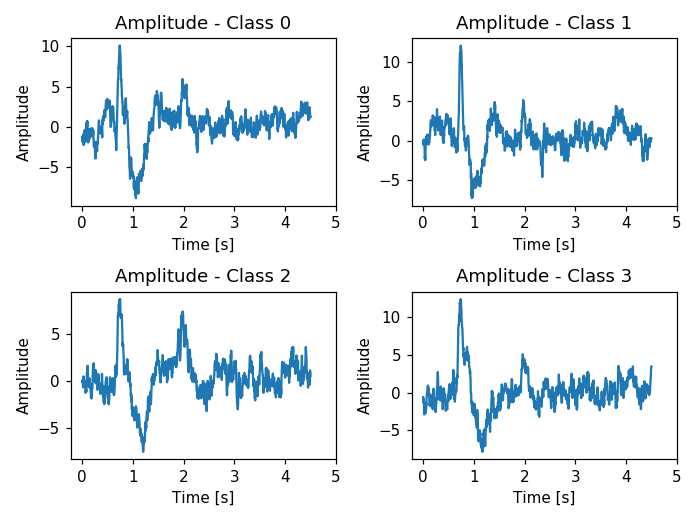

interactive(children=(IntSlider(value=0, description='channel_idx', max=21), Output()), _dom_classes=('widget-…

In [6]:
from visualization_functions.signal_visualizers import temporal_plot
%matplotlib notebook
fig, ax = plt.subplots(2,2)

@interact(channel_idx=(0,21))
def plot(channel_idx=0):
    [ axis.clear() for axis in ax.flatten() ]
    [ temporal_plot(np.mean(X_train[y_train==c], axis=0)[channel_idx], 
                    title='Amplitude - Class {}'.format(c),
                    fig=fig, ax_idx=c) for c in [0,1,2,3] ]
    
    fig.tight_layout()

### Voltage amplitude (trial-wise)
[Back to top](#Sections) <br>

Can be useful for bad trials/channels detection (abnormal voltage). 

<IPython.core.display.Javascript object>


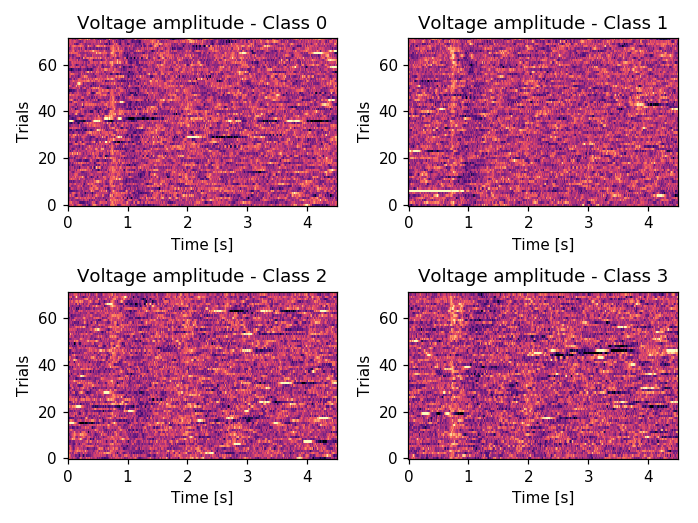

interactive(children=(IntSlider(value=0, description='channel_idx', max=21), IntSlider(value=40, description='…

In [8]:
from visualization_functions.signal_visualizers import amplitude2D_plot
plt.close()
fig, ax = plt.subplots(2,2)

@interact(channel_idx=(0,21), vmax=(1,100,1))
def plot(channel_idx=0, vmax=40):
    [ axis.clear() for axis in ax.flatten() ]
    [ amplitude2D_plot(X_train[y_train==c][:, channel_idx, :], vmax=vmax, 
                       title='Voltage amplitude - Class {}'.format(c), fig=fig, ax_idx=c) for c in [0,1,2,3] ]
    
    fig.tight_layout()

### Mean voltage amplitude (channel-wise)
[Back to top](#Sections) <br>

Can be useful for ERP visualization over channels (after trials averaging).

<IPython.core.display.Javascript object>


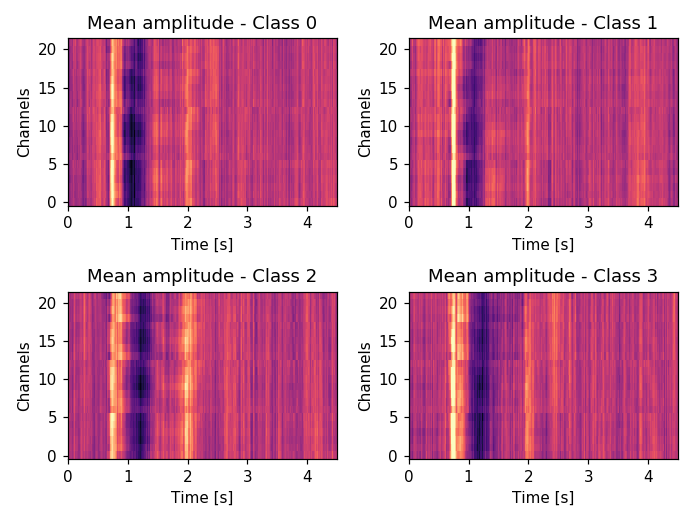

interactive(children=(IntSlider(value=10, description='vmax', min=1), Output()), _dom_classes=('widget-interac…

In [9]:
from visualization_functions.signal_visualizers import amplitude2D_plot
plt.close()
fig, ax = plt.subplots(2,2)

@interact(vmax=(1,100,1))
def plot(vmax=10):
    [ axis.clear() for axis in ax.flatten() ]
    [ amplitude2D_plot(np.mean(X_train[y_train==c], axis=0), y_label="Channels", vmax=vmax, 
                       title='Mean amplitude - Class {}'.format(c), fig=fig, ax_idx=c) for c in [0,1,2,3] ]
    
    fig.tight_layout()

### PSD - Power Spectral Density
[Back to top](#Sections) <br>

Can be useful for noise contamination detection (50Hz, etc...).

<IPython.core.display.Javascript object>


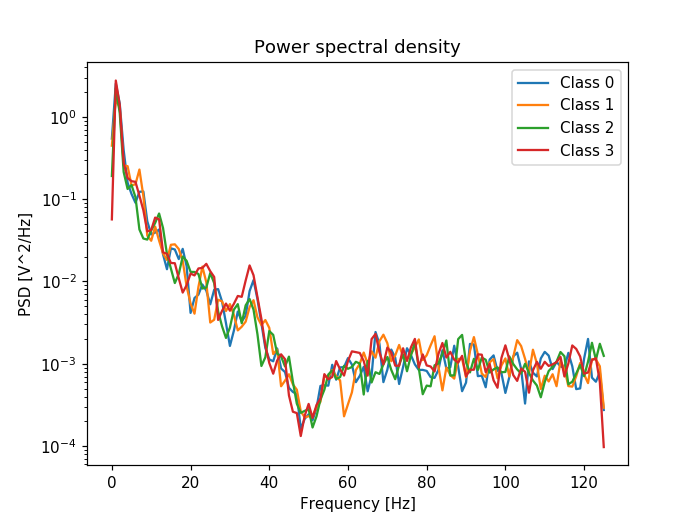

interactive(children=(IntSlider(value=0, description='channel_idx', max=21), IntSlider(value=250, description=…

In [10]:
from visualization_functions.signal_visualizers import psd_plot
plt.close()
fig, ax = plt.subplots()

@interact(channel_idx=(0,21), nperseg=(10,500,10))
def plot(channel_idx=0, nperseg=250):
    ax.clear()
    [ psd_plot(np.mean(X_train[y_train==c], axis=0)[channel_idx], 
               nperseg=nperseg, fig=fig, ax_idx=0) for c in [0,1,2,3] ]
    #ax.set_xlim([4,38])
    ax.set_title('Power spectral density')
    ax.legend(['Class 0', 'Class 1', 'Class 2', 'Class 3'])

### STFT - Short Time Fourier Transform
[Back to top](#Sections) <br>

Can be useful to visualize mu & beta bands.

<IPython.core.display.Javascript object>


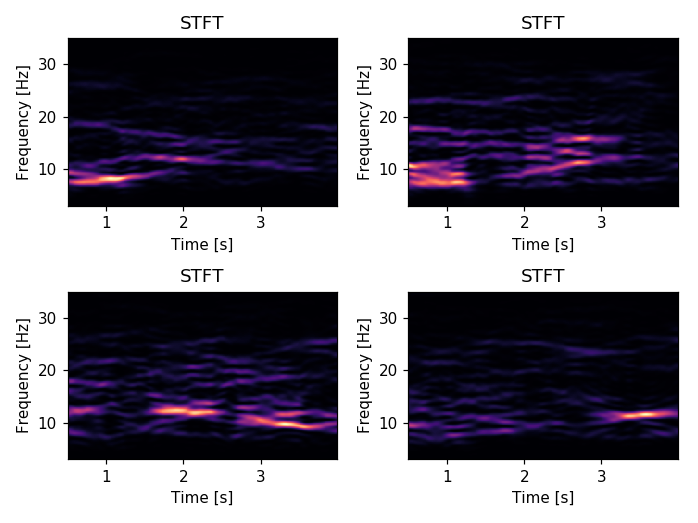

interactive(children=(IntSlider(value=250, description='nperseg', max=500, min=10, step=10), FloatSlider(value…

In [11]:
from visualization_functions.signal_visualizers import stft_plot
from preprocessing_functions.preproc_functions import filtering
plt.close()
fig, ax = plt.subplots(2,2)

X = filtering(X_train, f_low=8, f_high=30)

@interact(nperseg=(10,500,10), r_nfft=(1,10,0.1), r_nover=(0.8, 0.99, 0.01))
def plot(nperseg=250, r_nfft=8, r_nover=0.99):
    [axis.clear() for axis in ax.flatten()]

    [ stft_plot(np.mean(X[y_train==c], axis=0)[0], f_min=3, f_max=35, fig=fig, ax_idx=c, 
                nperseg=nperseg, r_nover=r_nover, r_nfft=r_nfft) for c in [0,1,2,3]]
    
    fig.tight_layout()

### CWT - Continuous Wavelet Transform
[Back to top](#Sections) <br>

Alternative for STFT (less parameters to tune, no compromize between freq/time resolution).

<IPython.core.display.Javascript object>


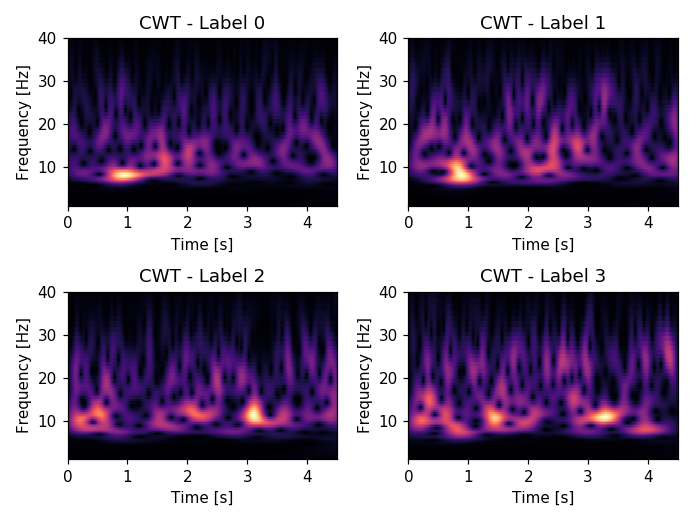

interactive(children=(IntSlider(value=0, description='channel_idx', max=21), IntSlider(value=8, description='w…

In [502]:
from visualization_functions.signal_visualizers import wavelets_plot
plt.close()
fig, ax = plt.subplots(2,2)

@interact(channel_idx=(0,21), w0=(1,20,1))
def plot(channel_idx=0, w0=8):
    [axis.clear() for axis in ax.flatten()]

    [ wavelets_plot(np.mean(X[y_train==c], axis=0)[channel_idx], n_freqs=100, f_min=1, f_max=40, w0=w0, 
                    log_scale=False, title='CWT - Label {}'.format(c), fig=fig, ax_idx=c) for c in [0,1,2,3]]
    
    fig.tight_layout()

### t-SNE - t-Distributed Stochastic Neighbor Embedding
[Back to top](#Sections) <br>

Useful to determine if feature extraction method learn to distinguish the different labels.

<IPython.core.display.Javascript object>


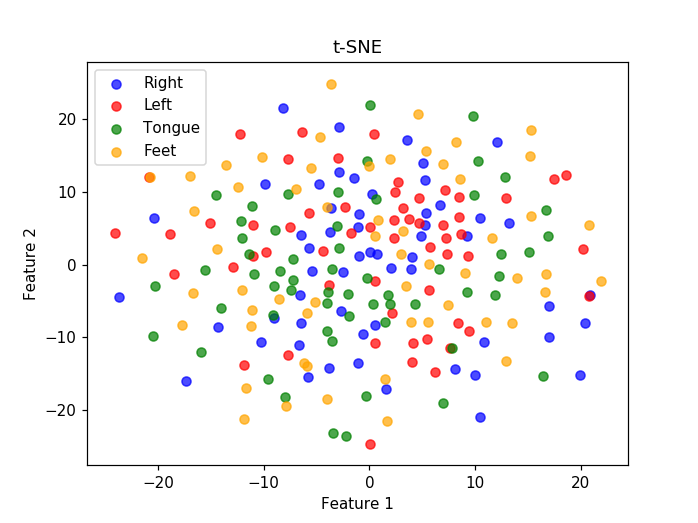

interactive(children=(IntSlider(value=20, description='perplexity', min=5, step=5), Output()), _dom_classes=('…

In [516]:
from visualization_functions.signal_visualizers import tsne_plot
fig, ax = plt.subplots()

@interact(perplexity=(5,100,5))
def plot(perplexity=20):
    tsne_plot(X_train, y_train, perplexity=perplexity, fig=fig, ax_idx=0)